### Question 1

Use the techniques you learned in class to solve this problem.

(a) Zoo Animal Classification data set will be used in this problem. Load the data set from below link.<br>
https://www.kaggle.com/uciml/zoo-animal-classification

In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

#reading Zoo Dataset from csv file.
zoo = r'C:\Users\janah\Desktop\ML - 257\Assignments\HW4\zoo.csv'

In [2]:
class_df = pandas.read_csv(r'C:\Users\janah\Desktop\ML - 257\Assignments\HW4\class.csv')
class_df

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


(b) List target names and feature names of Zoo Animal Classification dataset.

Feature Names =  animal_name, hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathe, fins, legs, tail, domestic, catsize.

Target Name = class_type

In [3]:
#creating a training set
training_set = pandas.read_csv(zoo,index_col = False)

In [4]:
zoo_data_df = training_set[['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize']]
zoo_target_df = training_set[['class_type']]
zoo_target = zoo_target_df.values
zoo_data = zoo_data_df.values

(c) Split your data using model selection.train test split to 80% training data and 20% test data.

In [5]:
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(zoo_data, zoo_target, test_size=0.2)

(d)  Use appropriate model and train with the training data set. Test your trained model on the test data set and classify the values of the samples in the test data set.

In [6]:
m=LogisticRegression()
m.fit(zoo_data,zoo_target)

predictions = m.predict(x_test)
print(predictions)

[4 7 1 1 6 2 1 2 3 2 2 1 6 6 1 7 1 1 1 2 2]


(f) Calculate the accuracy and plot Confusion Matrix.
 <br>

In [7]:
from sklearn.metrics import accuracy_score

print( accuracy_score(y_test, predictions))

1.0


[[8 0 0 0 0 0]
 [0 6 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 2]]


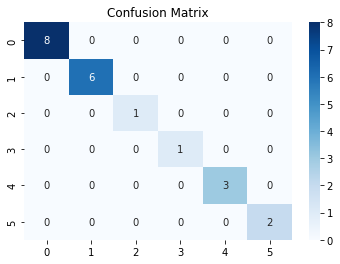

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

(e) Write your comments about the confusion matrix of your experiment.

Confusion Matrix:
 - Actual count    : Mammal-6, Bird-5, Reptail-1, Fish-4, Amphibian-1, Bug-1, Invertebrate-3
 - Predicted count : Mammal-6, Bird-5, Reptail-1, Fish-4, Amphibian-1, Bug-1, Invertebrate-3
 - From the above heatmap we can observe there are no false predictions.
 - As the accuracy score is 1.0, we can say there is no error in the confusion matrix.

### Question 2

The handwritten digit data set MNIST is a subset of NIST, which can be used for simple implementation of machine learning algorithms. In this problem, you will use support vector machine to finish the classification of MNIST. <br>
https://www.kaggle.com/c/digit-recognizer/data

(a) Load the first 10K samples from "train.csv" and split them into training and testing data by 0.2. Use sklearn.svm to train a model with raw pixel features. Choose the linear kernel and set C = 5 and gamma= 0.05. Report the model.

In [9]:
train = r'C:\Users\janah\Desktop\ML - 257\Assignments\HW4\train.csv'
data = pandas.read_csv(train)
data.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [11]:
train_df = data.iloc[:10000, : ]

In [12]:
train_df.shape

(10000, 785)

In [13]:
X = train_df.drop(columns='label')
y = train_df['label']

In [14]:
X.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
X_train.shape

(8000, 784)

In [30]:
y_train.shape

(8000,)

In [31]:
X_test.shape

(2000, 784)

In [32]:
y_test.shape

(2000,)

In [16]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=5, gamma=0.05)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [17]:
y_pred

array([7, 4, 8, ..., 8, 7, 2], dtype=int64)

In [18]:
np.array(y_test)

array([7, 4, 8, ..., 6, 7, 2], dtype=int64)

(b) How many support vectors does each class have? List the support vectors for each class and test the prediction accuracy by metrics.classification report.

In [19]:
# Get number of vectors for each class
clf.n_support_ 

array([156, 132, 254, 268, 215, 324, 177, 206, 304, 300])

In [20]:
clf.classes_ # each class in the below output corresponds to the above output respectively.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [21]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.913


(c) Repeat (a) and (b) with a RBF kernel and the same C and gamma.

In [22]:
# Refitting the model with rbf kernel

clf2 = svm.SVC(kernel='rbf', C=5, gamma=0.05)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [23]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [24]:
np.array(y_test)

array([7, 4, 8, ..., 6, 7, 2], dtype=int64)

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.109


(d) Compare the two models and comment on the results.

Observations:
 - SVM linear kernal = Accuracy score : 0.913
 - SVM rbf kernal = Accuracy score : 0.109
 - With this we conclude linear kernal has better performance than rbf kernal. So, with this we can infer the datapoints in the hyperplane has linear relationshiops.